In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.lines as mlines
from utils import SyntheticDataset

from sklearn.datasets import make_blobs
from PIL import Image

Sklearn way

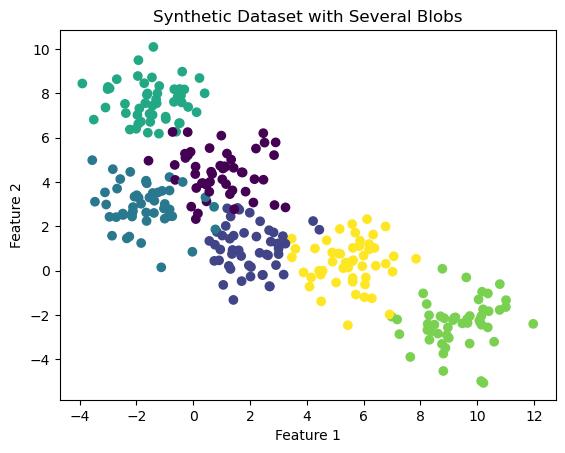

In [3]:
# Create a dataset with 3 blobs
X, y = make_blobs(n_samples=300, centers=6, n_features=2, cluster_std=1.0, random_state=0)

# Visualizing the data
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('Synthetic Dataset with Several Blobs')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [4]:
X_extra, y_extra = make_blobs(n_samples = 150, centers=3, n_features=2, cluster_std=1.0, random_state=123)

no_samples = len(X_extra)
y_extra = np.random.randint(7, 10, no_samples)

X = np.vstack([X, X_extra.copy()])
y = np.hstack([y, y_extra.copy()])



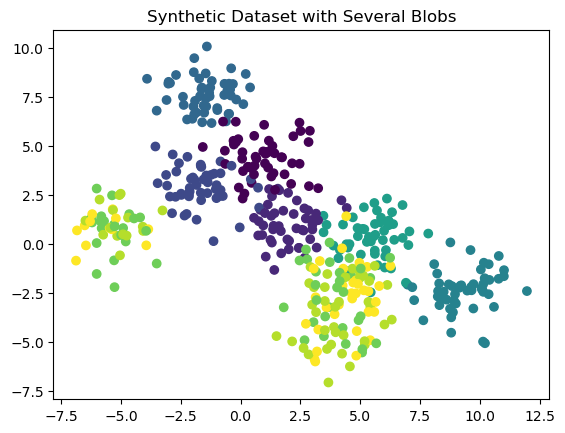

In [5]:
# Visualizing the data
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('Synthetic Dataset with Several Blobs')
plt.show()

Numpy way

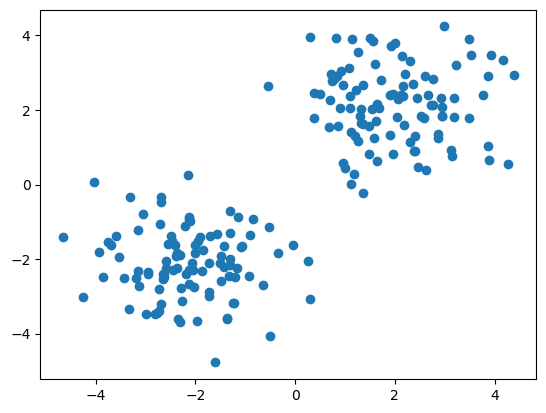

In [6]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

mean1 = [2, 2]
cov1 = [[1, 0], [0, 1]]

mean2 = [-2, -2]
cov2 = [[1, 0], [0, 1]]

labels = []

# Generate samples
data1 = np.random.multivariate_normal(mean1, cov1, 100)
data2 = np.random.multivariate_normal(mean2, cov2, 100)

# Combine the data from the two clusters
data = np.vstack((data1, data2))

# Plot
plt.scatter(data[:, 0], data[:, 1])
plt.show()


From Image

In [7]:
from utils import SyntheticDataset

# Replace 'your_image_path.jpg' with the path to your image
image_path = "C:/Users/Zayan/Documents/code/personal_repos/adaptive vector quantization/assets/dataset1.png"

dataset = SyntheticDataset(image_path)
dataset.generate_data_from_img()
df_numeric_classes = dataset.transform_to_numeric_classes('class')
df = dataset.get_dataset()


In [8]:
df

,coordinate,rgb,class
0,"(346, 229)","(63, 72, 204)",blue
1,"(346, 230)","(63, 72, 204)",blue
2,"(346, 231)","(63, 72, 204)",blue
3,"(346, 232)","(63, 72, 204)",blue
4,"(346, 233)","(63, 72, 204)",blue
...,...,...,...
6143,"(794, 388)","(237, 28, 36)",red
6144,"(794, 389)","(237, 28, 36)",red
6145,"(794, 390)","(237, 28, 36)",red
6146,"(794, 391)","(237, 28, 36)",red


In [9]:
type(df)

pandas.core.frame.DataFrame

In [10]:
df['class'].value_counts()

class
red       2560
blue      1518
green     1417
yellow     653
Name: count, dtype: int64

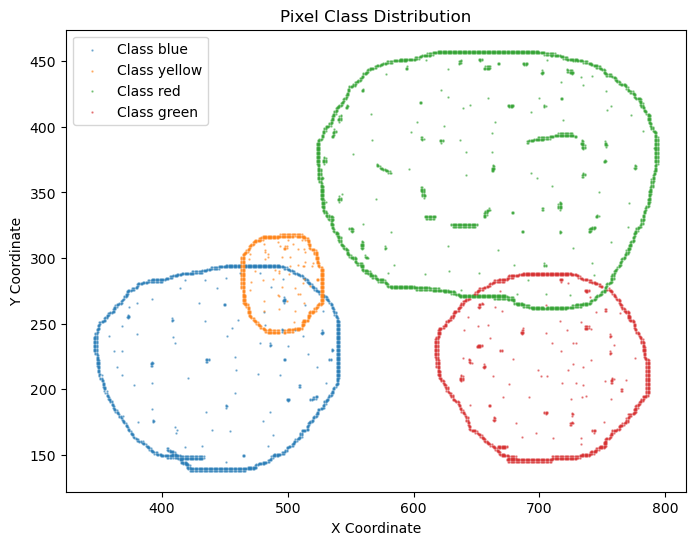

In [11]:
dataset.plot_data()

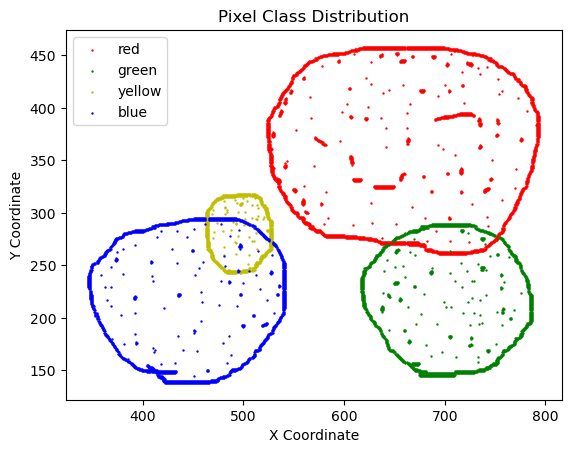

In [12]:
# Create a figure and axis for the plot
fig, ax = plt.subplots()

# List of colors for plotting, should match the classes in your DataFrame
colors = {'red': 'r', 'green': 'g', 'yellow': 'y', 'blue': 'b'}

# Plot each class with its respective color
for label, color in colors.items():
    subset = df[df['class'] == label]
    subset_x = [coord[0] for coord in subset['coordinate']]
    subset_y = [coord[1] for coord in subset['coordinate']]

    ax.scatter(subset_x, subset_y, c=color, s=0.5, label=label)

# Optional: Invert y-axis to match the image's original coordinate system
# ax.invert_yaxis()

# Optional: Add legend and titles
ax.legend()
plt.title('Pixel Class Distribution')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()


## Neural Gas

In [13]:
class NeuralGas:
    def __init__(self, dataset, n_neurons, decay=0.5, learning_rate=0.0001, lambda_=1.0, max_iter = 100, lifetime=10):

        
        if isinstance(dataset, pd.DataFrame):
            self.data = dataset.to_numpy()
        else:
            self.data = dataset

        self.n_neurons = n_neurons # number of prototype vectors/neurons/codebook vectors
        self.connections = np.zeros((n_neurons, n_neurons)) # initialize connections
        self.decay = decay
        self.learning_rate = learning_rate
        self.lambda_ = lambda_
        self.max_iter = max_iter
        self.lifetime = lifetime

    def fit(self):
        pass
        
        

We need a `connection matrix' that indicates which neurons are connected.

```
connections = np.zeros(neurons.shape[0], neurons.shape[0])
```

# Test with a few codebooks and 1 input

connections
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
neurons =  [[0.20492369 0.34169811]
 [0.67624248 0.87923476]
 [0.54367805 0.28269965]
 [0.03023526 0.71033683]
 [0.0078841  0.37267907]]
input =  [[0.53053721 0.92211146]]
distances
[0.6655102  0.15188297 0.63954683 0.54327759 0.75831539]
Sorted indices for distances
[1 3 2 0 4]
closest neuron =  [0.67624248 0.87923476]
closest neuron =  [0.03023526 0.71033683]
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


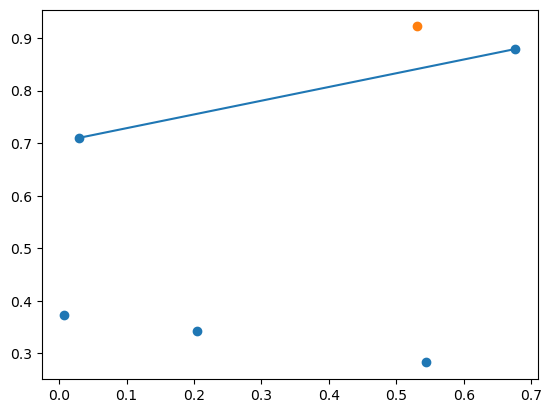

In [14]:
# test

# create sample neurons and an input
neurons = np.random.rand(5,2) # 5 neurons
input = np.random.rand(1,2) # 1 input

# initialize connection matrix
connections = np.zeros((neurons.shape[0], neurons.shape[0]))
print("connections")
print(connections)

plt.figure()
plt.scatter(neurons[:,0], neurons[:,1])
plt.scatter(input[0][0], input[0][1])


# calculate distances
print("neurons = ", neurons)
print("input = ", input)
print("distances")
distances = np.linalg.norm(neurons-input, axis=1)
print(distances)

# sort distances 
print("Sorted indices for distances")
sorted_indices = np.argsort(distances)
print(sorted_indices)

# find closest and second closest neurons/codebooks/prototypes
closest_neuron = neurons[sorted_indices[0]]
second_closest_neuron = neurons[sorted_indices[1]]
print("closest neuron = ", closest_neuron)
print("closest neuron = ", second_closest_neuron)

# make connection and plot connection
connections[sorted_indices[0], sorted_indices[1]] = 1 # change on the upper triange
print(connections)

x_coords = [closest_neuron[0], second_closest_neuron[0]]
y_coords = [closest_neuron[1], second_closest_neuron[1]]

plt.plot(x_coords, y_coords)
plt.show()


# Test with a few codebooks and 2 inputs

In [15]:
# test
np.random.seed(0)
# create sample neurons and an input
weights = np.random.rand(5,2)
X = np.random.rand(2,2)

connections = np.zeros((weights.shape[0], weights.shape[0]))
lifetimes = np.zeros_like(connections)

print("connections")
print(connections)
print("lifetimes")
print(lifetimes)



connections
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
lifetimes
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


---
Iteration  0
neurons =  [[0.54881909 0.71525049]
 [0.79120749 0.52893871]
 [0.4236548  0.64589412]
 [0.56789075 0.92555676]
 [0.96361905 0.38347849]]
inputs =  [[0.79172504 0.52889492]
 [0.56804456 0.92559664]]
distances
[[3.06156328e-01 5.19401570e-04 3.86218217e-01 4.55458455e-01
  2.25152146e-01]
 [2.11222916e-01 4.55125480e-01 3.14772780e-01 1.58897217e-04
  6.71097057e-01]]
Sorted indices for distances
[[1 4 0 2 3]
 [3 0 2 1 4]]
closest neurons =  [[0.79120749 0.52893871]
 [0.56789075 0.92555676]]
second closest neurons =  [[0.96361905 0.38347849]
 [0.54881909 0.71525049]]
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
0
[0.54881918 0.71525145]
1
[0.79120749 0.52893871]
2
[0.4236548  0.64589412]
3
[0.56790613 0.92556075]
4
[0.96361905 0.38347849]
---
Iteration  1
neurons =  [[0.54881918 0.71525145]
 [0.79120749 0.52893871]
 [0.4236548  0.645894

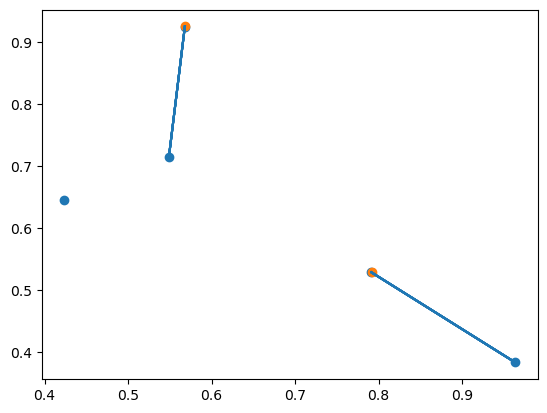

In [19]:
fig, ax = plt.subplots()
ax.scatter(weights[:,0], weights[:,1])
ax.scatter(X[:,0], X[:,1])

max_iter = 10
eps = 0.1
lambda_ = 0.1
max_lifetime = 5

for iter in range(max_iter):
    print("---")
    print("Iteration ", iter)

    # calculate distances
    print("neurons = ", weights)
    print("inputs = ", X)
    print("distances")
    distances = np.array([np.linalg.norm(weights-x, axis=1) for x in X])
    print(distances)

    # sort distances 
    print("Sorted indices for distances")
    ranking = np.argsort(distances)
    print(ranking)

    # find closest and second closest neurons/weights/prototypes
    closest_neurons = weights[ranking[:,0]]
    second_closest_neurons = weights[ranking[:,1]]
    print("closest neurons = ", closest_neurons)
    print("second closest neurons = ", second_closest_neurons)

    # make connection and plot connection
    # update connection matrix
    for i in range(len(X)):

        if connections[ranking[i][0], ranking[i][1]] != 1: # if connection doesn't exist
            connections[ranking[i][0], ranking[i][1]] = 1 # make connection
            lifetimes[ranking[i][0], ranking[i][1]] += 1 # increase age
        else: # if connection exists
            if lifetimes[ranking[i][0], ranking[i][1]] == max_lifetime: # if lifetime is at its max
                connections[ranking[i][0], ranking[i][1]] = 0 # break connection
                lifetimes[ranking[i][0], ranking[i][1]] = 0 # reset age
            else: # if lifetime is not at its max
                lifetimes[ranking[i][0], ranking[i][1]] += 1 # increase age

    print(connections)
    print(lifetimes)

    # loop over connection matrix and find neurons to connect. Then connect them in the plot
    for r in range(connections.shape[0]):
        for c in range(connections.shape[1]):
            if connections[r,c] == 1:
                codebook1 = weights[r]
                codebook2 = weights[c]

                x_coords = [codebook1[0], codebook2[0]]
                y_coords = [codebook1[1], codebook2[1]]

                line = mlines.Line2D(x_coords, y_coords)
                ax.add_line(line)

    # select random input & update weights
    sampled_input_idx = np.random.randint(0, len(X))
    sampled_input = X[sampled_input_idx]

    for i in range(len(weights)):
        print(i)
        # determine k: number of neurons closer to sampled input v than w itself
        k = np.where(ranking[sampled_input_idx] == i)[0]
        # update weight
        weights[i] = weights[i] + eps * np.exp(-k/lambda_)*(sampled_input - weights[i])
        print(weights[i])
plt.show()
